In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

## 1. Import Params

In [2]:
params_dir = "config/config.yaml"

In [3]:
def load_params(params_dir):
    with open(params_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
params = load_params(params_dir)

In [5]:
params

{'columns_to_keep': ['hdi', 'continent', 'EFConsPerCap'],
 'raw_dataset_dir': 'data/raw/',
 'train_set_path': ['data/processed/x_train.pkl',
  'data/processed/y_train.pkl'],
 'valid_set_path': ['data/processed/x_valid.pkl',
  'data/processed/y_valid.pkl'],
 'test_set_path': ['data/processed/x_test.pkl', 'data/processed/y_test.pkl'],
 'train_feng_set_path': ['data/processed/x_train_feng.pkl',
  'data/processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['data/processed/x_valid_feng.pkl',
  'data/processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['data/processed/x_test_feng.pkl',
  'data/processed/y_test_feng.pkl'],
 'raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'cleaned_raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'production_model_path': 'models/production_model.pkl',
 'ohe_continent_path': 'models/ohe_continent.pkl',
 'test_path': 'models/ohe_continent.pkl',
 'le_encoder_path': 'models/le_encoder.pkl',
 'training_log_path': 'log/training_log.json',
 'print_debug'

## 2. Load Train Set

In [6]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [7]:
x_train

,hdi,continent
471,0.413,Africa
925,0.910,Europe
322,0.456,Africa
168,0.757,North America
1170,0.366,Africa
...,...,...
183,0.703,Europe
783,0.578,North America
1422,0.577,North America
1993,0.658,Europe


In [8]:
y_train

471     1.055530
925     4.602575
322     1.065831
168     4.614050
1170    0.738863
          ...   
183     3.957488
783     1.763312
1422    1.709146
1993    2.339436
1168    0.776107
Name: EFConsPerCap, Length: 1725, dtype: float64

In [9]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [10]:
dataset

,hdi,continent,EFConsPerCap
471,0.413,Africa,1.055530
925,0.910,Europe,4.602575
322,0.456,Africa,1.065831
168,0.757,North America,4.614050
1170,0.366,Africa,0.738863
...,...,...,...
183,0.703,Europe,3.957488
783,0.578,North America,1.763312
1422,0.577,North America,1.709146
1993,0.658,Europe,2.339436


## 3. EDA

### 3.1. Cek Missing Value

In [11]:
# ubah kembali nilai yang awalnya adalah -1 menjadi NaN
dataset.replace(-1, np.nan, inplace = True)

In [12]:
# cek null value
dataset.isnull().sum()

hdi             0
continent       0
EFConsPerCap    0
dtype: int64

In [13]:
dataset.describe()

,hdi,EFConsPerCap
count,1725.000000,1725.000000
mean,0.663634,3.312210
std,0.168019,2.566883
min,0.261000,0.428228
25%,0.520000,1.421106
50%,0.692000,2.410972
75%,0.798000,4.733861
max,0.945000,17.021936


In [23]:
# cek data type
dataset.dtypes

hdi             float64
continent        object
EFConsPerCap    float64
dtype: object

### 3.2. Cek Informasi Statistik

#### 3.2.1. Cek Skewness

In [14]:
# cek skewness
dataset.skew(numeric_only = True)

hdi            -0.361024
EFConsPerCap    1.674195
dtype: float64

In [13]:
# pengecekan skewness dan pendekatan imputasi akan lebih baik jika berdasarkan kelas

#### 3.2.2. Pemisahan Dataset berdasarkan Kelas

In [15]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_asia = dataset[dataset.continent == "Asia"].copy()
dataset_europe = dataset[dataset.continent == "Europe"].copy()
dataset_africa = dataset[dataset.continent == "Africa"].copy()
dataset_oceania = dataset[dataset.continent == "Oceania"].copy()
dataset_n_america = dataset[dataset.continent == "North America"].copy()
dataset_s_america = dataset[dataset.continent == "South America"].copy()

In [15]:
# kelas Africa
dataset_s_america.describe()

,hdi,EFConsPerCap
count,132.000000,132.000000
mean,0.712129,3.362652
std,0.065937,1.712631
min,0.606000,1.807026
25%,0.657500,2.286151
50%,0.704000,2.981817
75%,0.772250,3.679233
max,0.845000,10.549027


In [16]:
# kelas Europe
dataset_europe.describe()

,hdi,EFConsPerCap
count,432.000000,432.000000
mean,0.826366,5.193968
std,0.068883,2.076745
min,0.597000,1.421106
25%,0.783750,3.991916
50%,0.837500,5.184596
75%,0.879250,6.044404
max,0.945000,17.021936


In [ ]:
# hdi               : mean dari kelas Africa dan Europe terpaut cukup jauh, maka akan menggunakan kelas
# EFConsPerCap      : mean dari kelas Africa dan Europe terpaut cukup jauh, maka akan menggunakan kelas


In [22]:
# cek skewness
print("Europe--------------")
print(dataset_europe.skew(numeric_only = True))
print("Africa--------------")
print(dataset_africa.skew(numeric_only = True))
print("Asia--------------")
print(dataset_asia.skew(numeric_only = True))
print("South America--------------")
print(dataset_s_america.skew(numeric_only = True))
print("North America--------------")
print(dataset_n_america.skew(numeric_only = True))
print("Oceania--------------")
print(dataset_oceania.skew(numeric_only = True))

Europe--------------
hdi            -0.703322
EFConsPerCap    2.065457
dtype: float64
Africa--------------
hdi             0.559856
EFConsPerCap    1.269865
dtype: float64
Asia--------------
hdi            -0.208069
EFConsPerCap    1.597532
dtype: float64
South America--------------
hdi             0.125410
EFConsPerCap    2.258957
dtype: float64
North America--------------
hdi            -0.091238
EFConsPerCap    1.864711
dtype: float64
Oceania--------------
hdi             0.134050
EFConsPerCap    0.987348
dtype: float64


In [ ]:
# dari pengecekan skewness bedasarkan kelas dataset di atas bahwa nilai EF cenderung skewed baik ke kiri maupun kanan ( lebih dari +- 0.5)
# imputasi untuk EF akan menggunakan median
# HDI memiliki nilai skew pada Europe dan Africa, sehingga imputasi akan menmggunakan median
# HDI untuk kelas lainnya cenderung kurang dari +-0.5 sehingga imputasi akan menggunakan mean

In [19]:
# HDI
# Print the median value for Europe and Africa
print(f"Median Europe: {dataset_europe.hdi.median()}")
print(f"Median Africa: {dataset_africa.hdi.median()}")

# Print the mean value for Asia, Oceania, North America, and South America
print(f"Mean Asia: {dataset_asia.hdi.mean()}")
print(f"Mean Oceania: {dataset_oceania.hdi.mean()}")
print(f"Mean North America: {dataset_n_america.hdi.mean()}")
print(f"Mean South America: {dataset_s_america.hdi.mean()}")

Median Europe: 0.8375
Median Africa: 0.4634999999999999
Mean Asia: 0.6774645669291338
Mean Oceania: 0.6976736842105266
Mean North America: 0.699756906077348
Mean South America: 0.7121287878787879


In [24]:
# EFConsPerCap
# Print the median value for all class
print(f"Median Europe: {dataset_europe.EFConsPerCap.median()}")
print(f"Median Africa: {dataset_africa.EFConsPerCap.median()}")
print(f"Median Asia: {dataset_asia.EFConsPerCap.median()}")
print(f"Median Oceania: {dataset_oceania.EFConsPerCap.median()}")
print(f"Median North America: {dataset_n_america.EFConsPerCap.median()}")
print(f"Median South America: {dataset_s_america.EFConsPerCap.median()}")

Median Europe: 5.184596045999999
Median Africa: 1.36272604
Median Asia: 1.980976941
Median Oceania: 2.638121757
Median North America: 2.010793637
Median South America: 2.981817165


#### 3.2.3. Visualisasi untuk fitur HDI

<AxesSubplot:xlabel='hdi', ylabel='Density'>

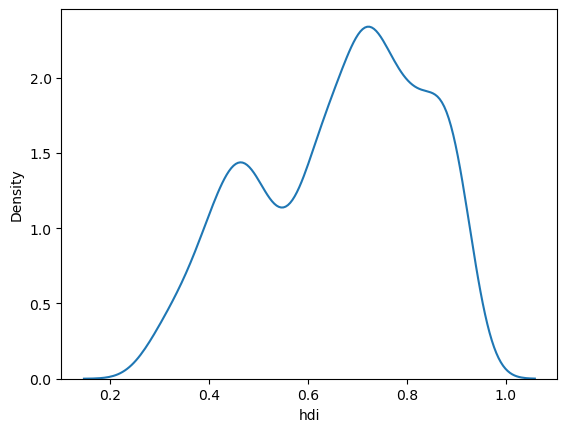

In [17]:
# plot untuk melihat distribusi HDI jika tidak dibedakan berdasarkan continent
sns.kdeplot(data = dataset, x = "hdi")
#plt.axvline(dataset.pm10.mean(), 0, 1, color = "g")

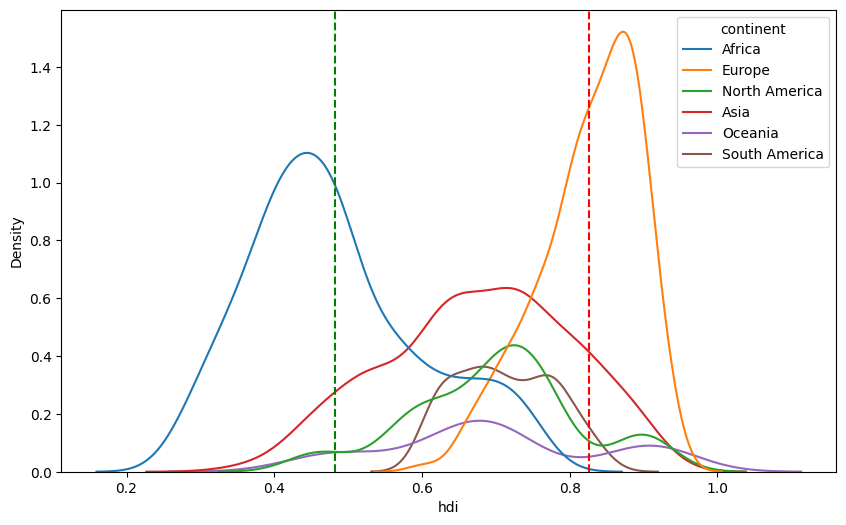

In [29]:
# plot untuk melihat distribusi HDI jika dibedakan berdasarkan continent
plt.figure(figsize=(10,6))
sns.kdeplot(data = dataset, x = "hdi", hue = "continent", legend = "best")

plt.axvline(dataset_africa.hdi.mean(), color = "g", linestyle="--")
plt.axvline(dataset_europe.hdi.mean(), 0, 1, color = "r", linestyle="--" )

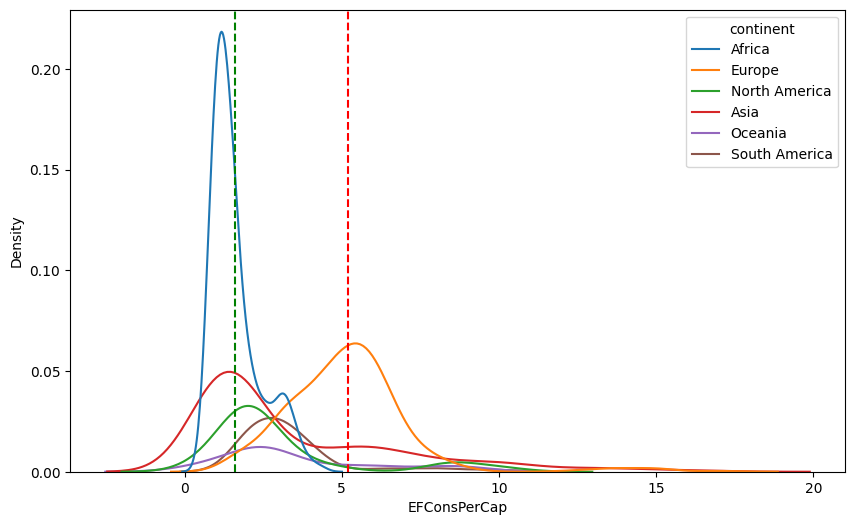

In [26]:
# plot untuk melihat distribusi EF jika dibedakan berdasarkan continent
plt.figure(figsize=(10,6))
sns.kdeplot(data = dataset, x = "EFConsPerCap", hue = "continent", legend = "best")

plt.axvline(dataset_africa.EFConsPerCap.mean(), color = "g", linestyle="--")
plt.axvline(dataset_europe.EFConsPerCap.mean(), 0, 1, color = "r", linestyle="--" )

In [ ]:
# distribusi skew ke kiri (nilai skew fisher-pearson negatif) untuk continent Africa, dan skew kanan untuk continent Europe
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk HDI akan menggunakan median untuk imputasi kelas Africa dan Europe, mean untuk kelas continent lainnya
# kesimpulan: untuk EFConsPerCap menggunakan median untuk imputasi semua kelas

#### 3.2.9. Pearson Corrlation

<Axes: >

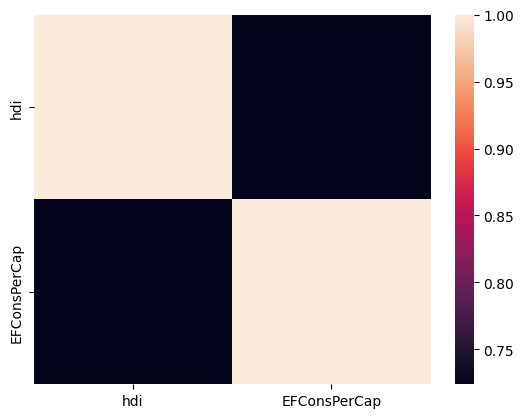

In [30]:
sns.heatmap(dataset.corr(numeric_only = True))

#### 3.2.10. T Test untuk HDI

In [ ]:
# h0    = mean HDI untuk Africa = mean HDI untuk Europe
# h1    = mean HDI untuk Africa != mean HDI untuk Europe

In [31]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_europe[dataset_europe.hdi.isnull() != True].hdi,
    dataset_africa[dataset_africa.hdi.isnull() != True].hdi
)

Ttest_indResult(statistic=53.54330424217592, pvalue=6.660948515647218e-287)

In [32]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6457384753208981

In [87]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara Africa dan Erope untuk HDI statistically significant

### 3.3. Cek Imbalance Label

<Axes: xlabel='continent', ylabel='Count'>

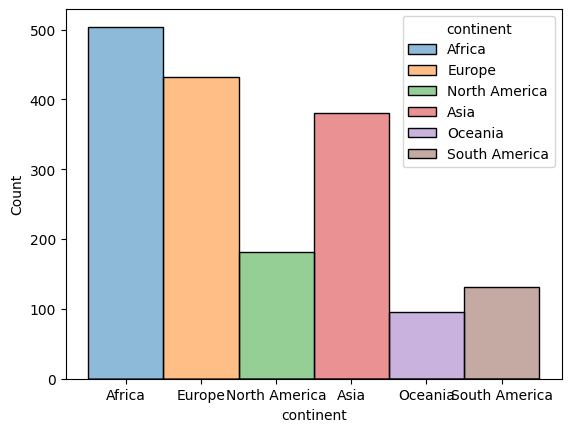

In [25]:
sns.histplot(data = dataset, x = "continent", hue = "continent")

In [21]:
#cek jumlah negara per kelas
dataset.continent.value_counts()/14

Africa           36.000000
Europe           30.857143
Asia             27.214286
North America    12.928571
South America     9.428571
Oceania           6.785714
Name: continent, dtype: float64

In [ ]:
# Ketimpangan pada dataset disebabkan karena jumlah negara pada tiap kelas tidak merata, terlihat Oceania memiliki negara paling sedikit dan Africa yang paling banyak.
# 

### 3.4. Cek Outliers

<Axes: xlabel='hdi'>

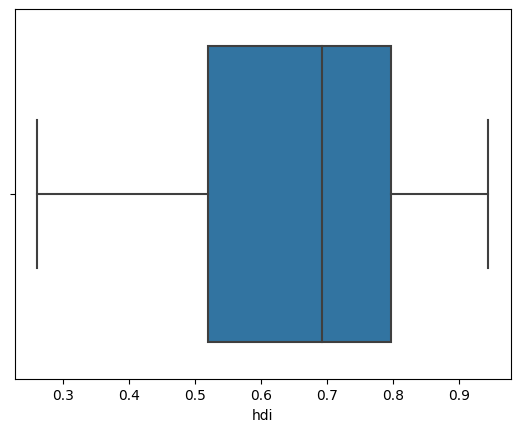

In [29]:
sns.boxplot(data = dataset, x = "hdi")

<Axes: xlabel='EFConsPerCap'>

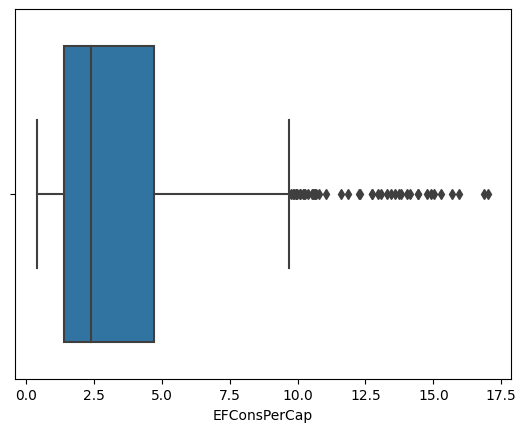

In [27]:
sns.boxplot(data = dataset, x = "EFConsPerCap")

In [ ]:
#Terlihat bahwa outlier sangat kentara pada fitur EF
#Mungkin lebih baik jika Outlier dicek berdasarkan kelas

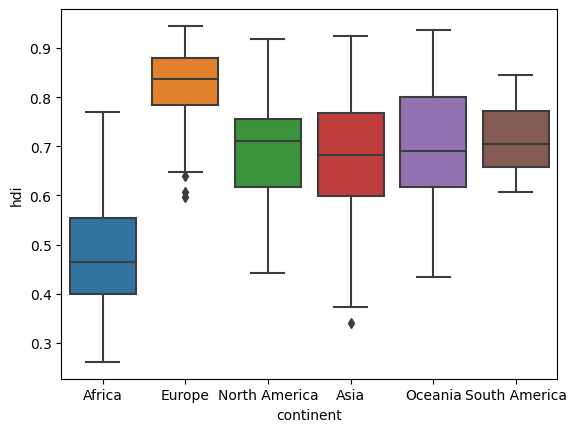

In [12]:
#boxplot continent vs HDI
sns.boxplot(x='continent', y='hdi', data=dataset, )

plt.show()

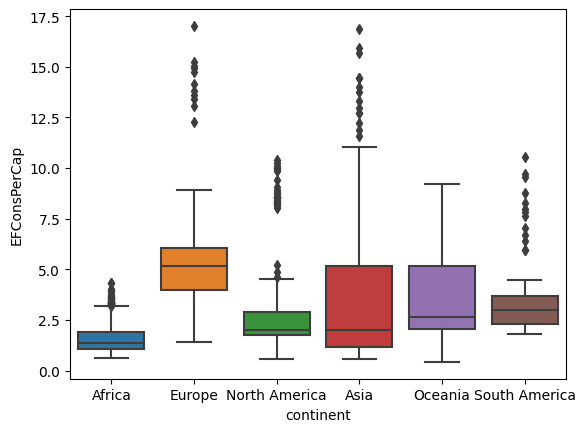

In [13]:
#boxplot continent vs EFConsPerCap
sns.boxplot(x='continent', y='EFConsPerCap', data=dataset)
plt.show()

In [18]:
# Setelah dicek berdasarkan kelas, dapat dilihat fitur HDI juga memiliki outlier untuk kelas Asia dan Europe
# Pada fitur EF, Outlier secara signifikan ada di semua kelas kecuali Oceania.
# Solusi imputasi ataupun drop data tidak dapat diaplikasikan pada dataset ini, karena permasalahannya adalah klasifikasi pada fitur continent terlalu sederhana, tidak mampu --
# -- merepresentasikan keragaman karakteristik negara-negara yang berlokasi di benua ybs.
# Solusi paling tepat adalah memperkecil lingkup model training dari sisi kewilayahan, yaitu dengan memperkecil ke skala regional (Asia Timur, Asia Tengara, Eropa Barat, dll)


## 4. Kesimpulan

1. Missing value handling

1.1. HDI       : median kelas untuk Europe dan Africa, mean kelas untuk kelas lainnya
1.2. EFConsPerCap  : median kelas untuk semua kelas

2. Outlier removal

Berdasarkan pertimbangan domain knowledge, maka tidak dilakukan outlier removal. Penanganan outlier yang paling tepat adalah dengan memperkecil lingkup model training
dari skala "world" menjadi "region".